*This Notebook was created by Antoine Palisson*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data Exploration

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml('california_housing', version=1, as_frame=True, parser='auto')
df = pd.concat([data['data'], data['target']], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


The California Housing dataset is a dataset about the price of the houses in California.<br> The `median_house_value` target variable is the target.

**<font color='blue'>1.a. What is the task of the dataset ? Is it a classification and a regression ?<br>1.b. What is the type of each feature ? Are they Nominal ? Ordinal ? Cyclical ? Numerical ?**

In [ ]:
# The label is numerical --> regression task
# All the features are numerical except the ocean_proximity feature that is nominal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   ocean_proximity     20640 non-null  category
 9   median_house_value  20640 non-null  int64   
dtypes: category(1), float64(4), int64(5)
memory usage: 1.4 MB


**<font color='blue'>2. Is there any missing values in the dataset ?**

In [ ]:
# The total_bedrooms feature has 207 missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

**<font color='blue'>3. Is there any duplicates in the dataset ?<br> If so, delete them.**

In [ ]:
# There is no duplicate in the data
df.duplicated().sum()

0

**<font color='blue'>4. Is there any outliers ? Use a z-score method <br>**

*Tips: Compute the z-score on the numerical data only.<br> Categorical data outliers must be analyzed differently.*

In [ ]:
# Categorical data
# The ocean_proximity feature contains a rare category : ISLAND
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# Numerical data
# First we compute the z-score
df_num = df.drop(['ocean_proximity'], axis=1)
df_zscore = (df_num - df_num.mean()) / df_num.std()

# Then, we can find outliers by using a threshold on the values
# There is a bit less than 2% of "soft" outliers (threshold = 3/-3) in the
# total_rooms, total_bedrooms, population, households and median_income features
upper_outliers = (df_zscore > 3).sum() 
lower_outliers = (df_zscore < -3).sum()

print("Upper Outliers")
print(upper_outliers, end='\n\n')
print("Lower Outliers")
print(lower_outliers, end='\n\n')

Upper Outliers
longitude               0
latitude                0
housing_median_age      0
total_rooms           373
total_bedrooms        368
population            342
households            363
median_income         345
median_house_value      0
dtype: int64

Lower Outliers
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64



In [ ]:
# There are also around 1% of "hard" outliers (threshold = 4) in the
# total_rooms, total_bedrooms, population, households and median_income features
upper_outliers = (df_zscore > 4).sum() 
lower_outliers = (df_zscore < -4).sum()

print("Upper Outliers")
print(upper_outliers, end='\n\n')
print("Lower Outliers")
print(lower_outliers, end='\n\n')

Upper Outliers
longitude               0
latitude                0
housing_median_age      0
total_rooms           199
total_bedrooms        204
population            195
households            195
median_income         132
median_house_value      0
dtype: int64

Lower Outliers
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64



**<font color='blue'>5.a. Analyze the label using graphs and statistics.<br>**

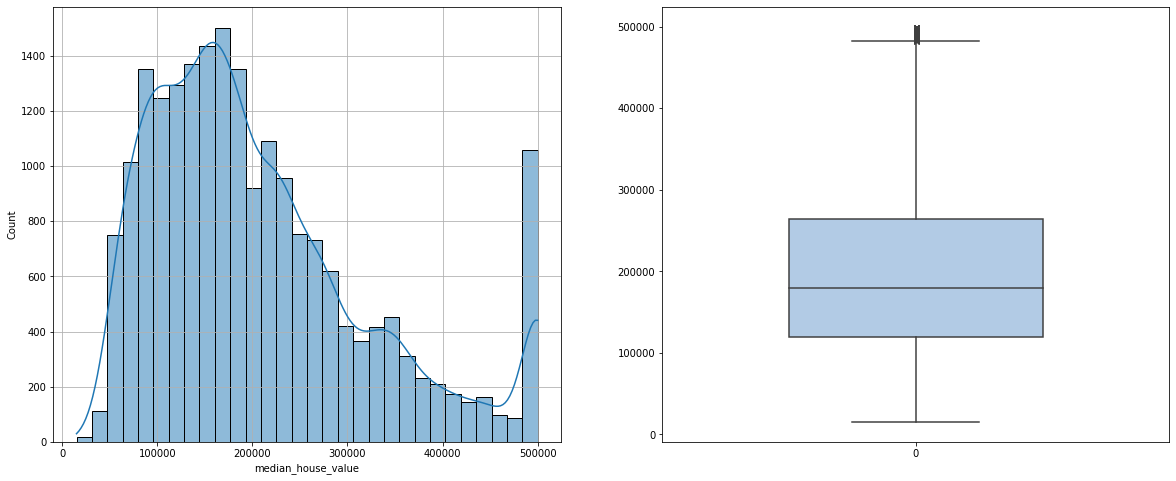

In [ ]:
# There is something strange around 500 000.
fig, axs = plt.subplots(1, 2, figsize=(20,8))
sns.histplot(df['median_house_value'], bins=30, kde=True, ax=axs[0])
axs[0].grid('on')
sns.boxplot(df['median_house_value'], 
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)}, 
            width=0.5, 
            ax=axs[1])
plt.show()

The 'median_house_value' maximum is : 500001



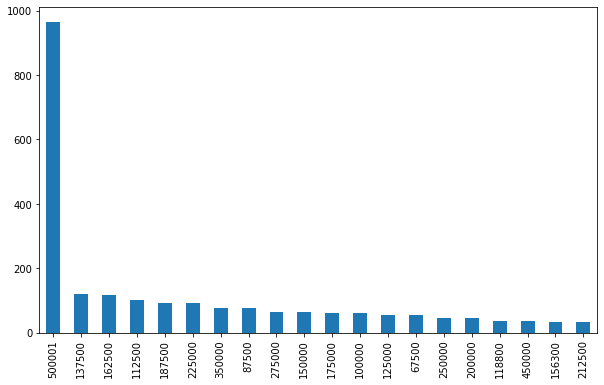

In [ ]:
# Some median_house_value are identical.
# 500 001 has 964 occurences and is the maximum value
# It seems that any value above 500 000 has been transformed into 500 001
# Other thresholds than 500 001 exist : 137 500, 162 500, 112 500 ...

print(f"The 'median_house_value' maximum is : {max(df['median_house_value'])}", end='\n\n')
df['median_house_value'][df['median_house_value'].duplicated()].value_counts().iloc[:20].plot.bar(figsize=(10,6))
plt.show()

**<font color='blue'>5.b. Analyze the features one by one using graphs, statistics ...<br>**

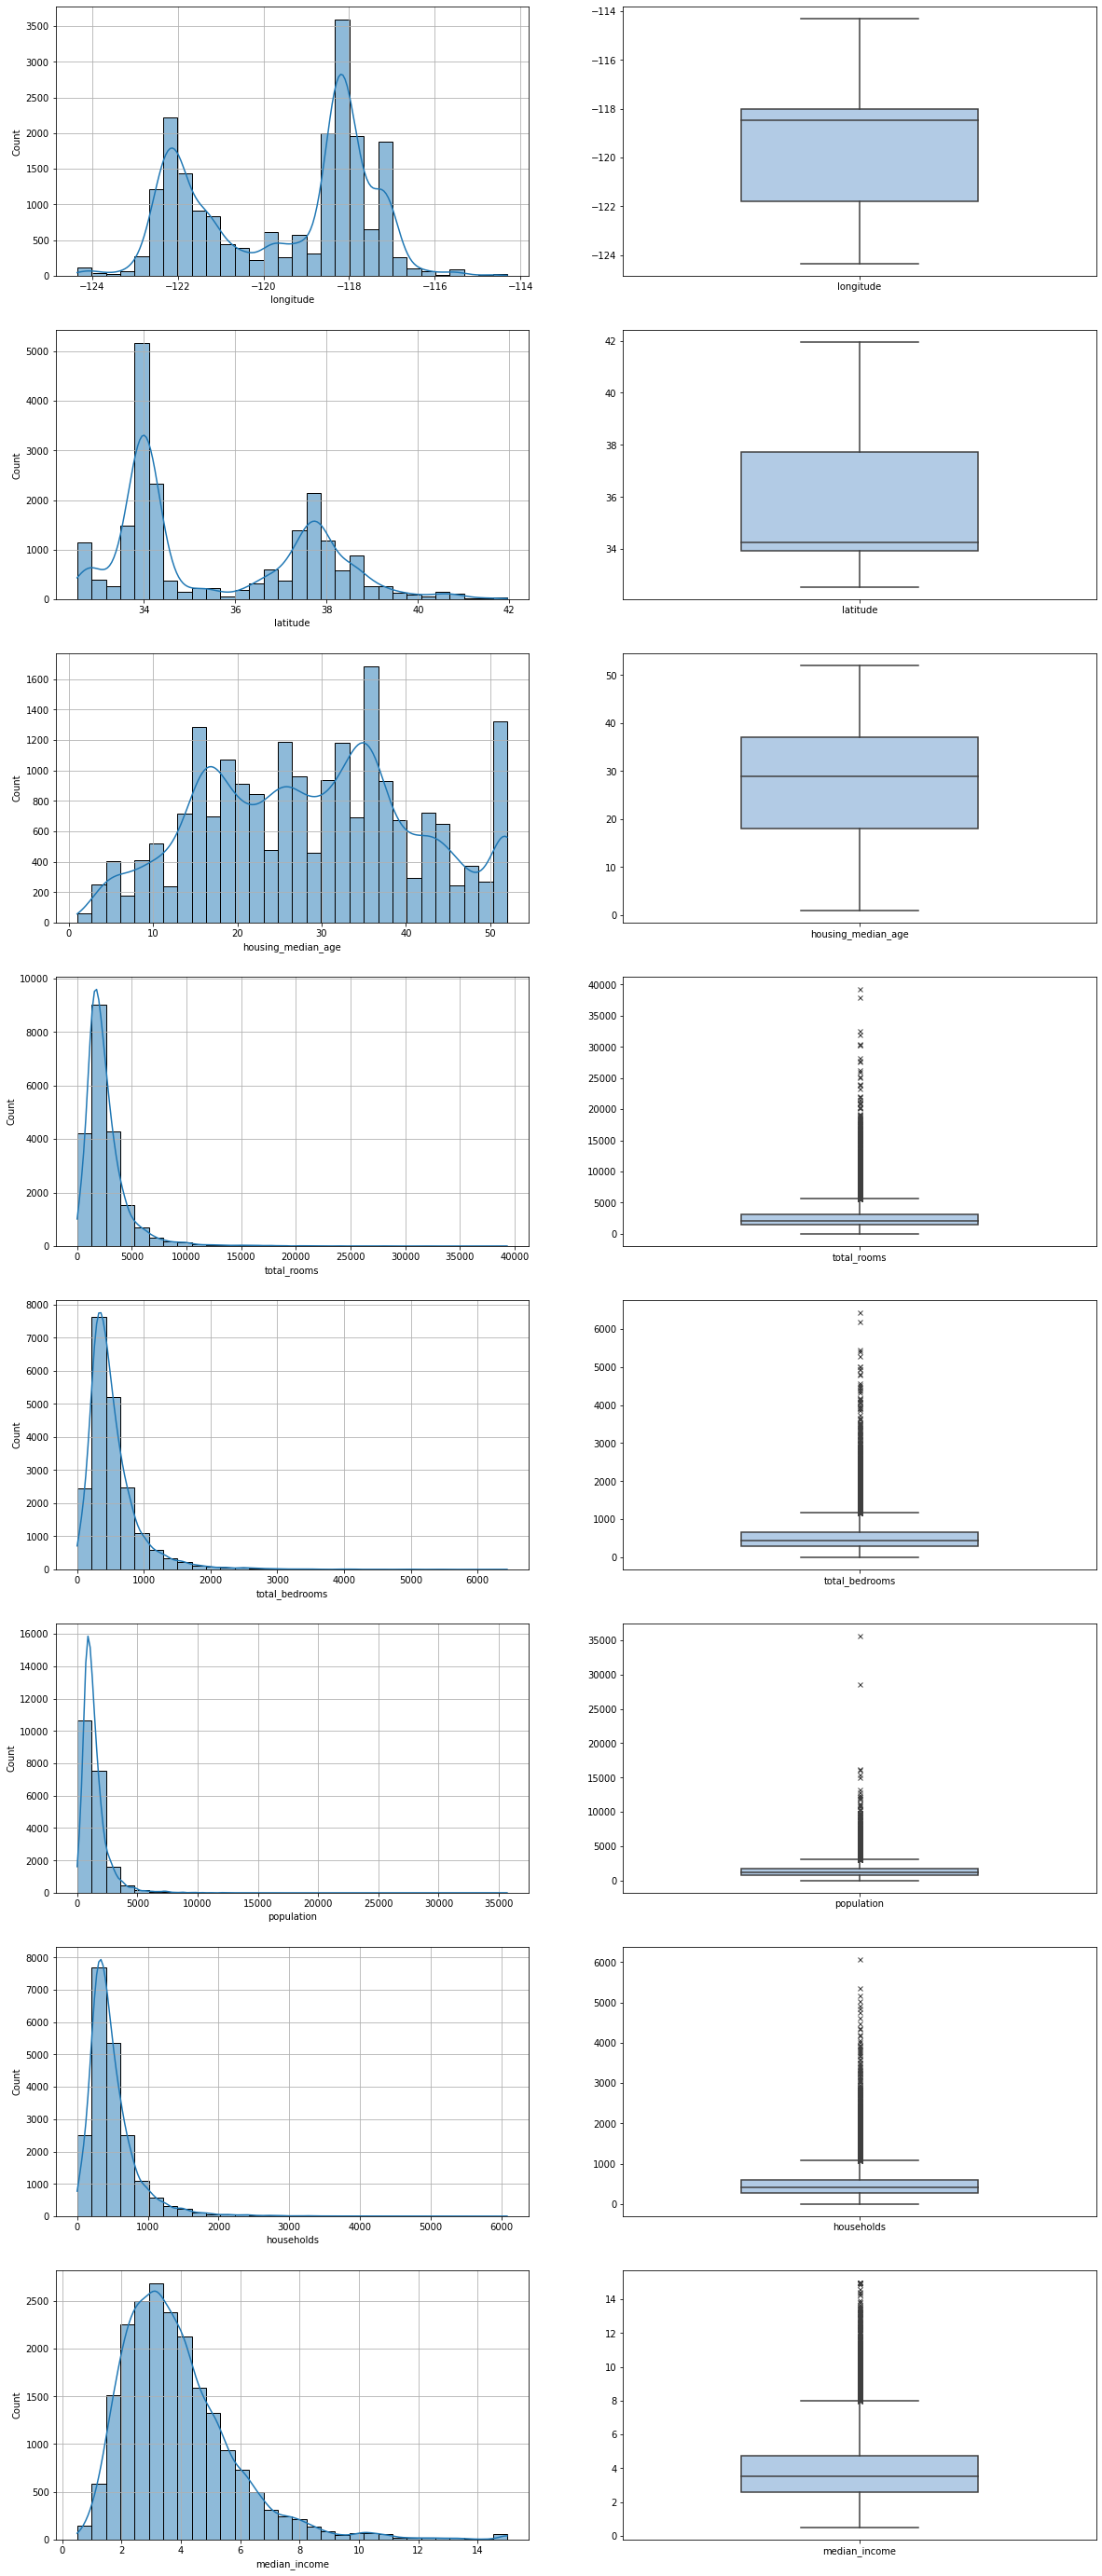

In [ ]:
# Numerical Features
# We can see many outliers
# Both housing_median_age and median_income seems capped (a maximum value has been set)
fig, axs = plt.subplots(8,2, figsize=(20,50))
col_names = df.drop('median_house_value', axis=1).select_dtypes(exclude=['category']).columns

for col, ax in zip(col_names, axs) :

    sns.histplot(df[col], 
                 bins=30, 
                 kde=True, 
                 ax=ax[0])
    ax[0].grid('on')
    sns.boxplot(df[[col]], 
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)}, 
                width=0.5, 
                ax=ax[1])


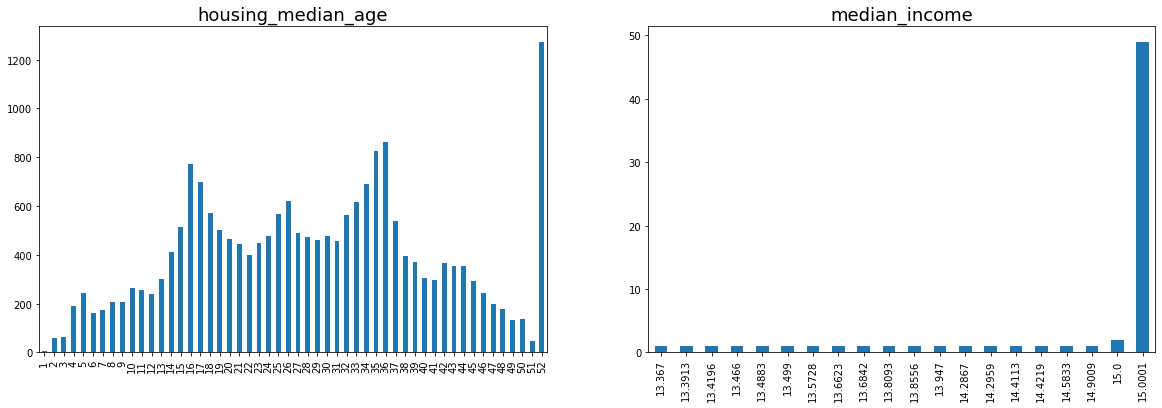

In [ ]:
# Indeed, the housing_median_age and median_income are capped
fig, axs = plt.subplots(1,2,figsize=(20,6))

df['housing_median_age'].value_counts().sort_index().plot.bar(ax=axs[0])
axs[0].set_title('housing_median_age', fontsize=18)
df['median_income'].value_counts().sort_index().iloc[-20:].plot.bar(ax=axs[1])
axs[1].set_title('median_income', fontsize=18)

plt.show()

**<font color='blue'>6.a. Analyze the relationships between the features using graphs, correlation ...<br>**

In [ ]:
!pip install -q pyproj
!pip install -q geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 37.3 MB/s eta 0:00:00


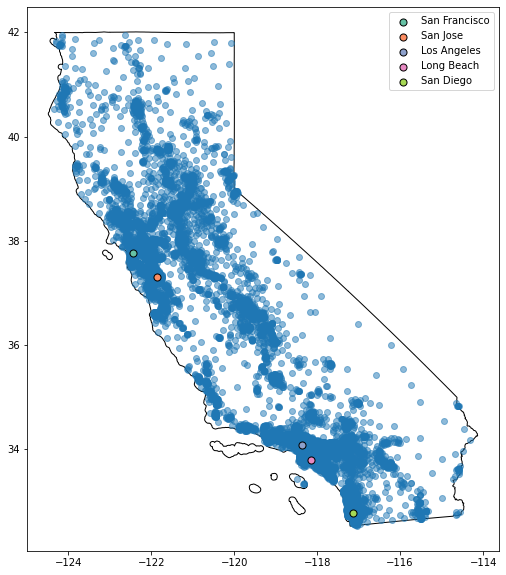

In [ ]:
# The houses are located in California, close to the coast and big cities

import pyproj
import geopandas as gpd
import matplotlib as mpl

ca = gpd.read_file('https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip')
ca = ca[ca['NAME'] == 'California']
cities = gpd.read_file('https://services1.arcgis.com/qr14biwnHA6Vis6l/arcgis/rest/services/California_Cities/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson')
cities = cities[cities['POP2000'] > cities['POP2000'].quantile(q=0.99)]

fig, ax = plt.subplots(figsize=(10,10))

ca.plot(ax=ax, color='white', edgecolor='black')
ax.scatter(df['longitude'],df['latitude'], alpha=0.5)
for i, (_, row) in enumerate(cities.iterrows()):
    ax.scatter(row.geometry.x, row.geometry.y, marker='o', color=mpl.colormaps['Set2'].colors[i], edgecolor='black', label=row['AREANAME'], s=50)

plt.legend()
plt.show()

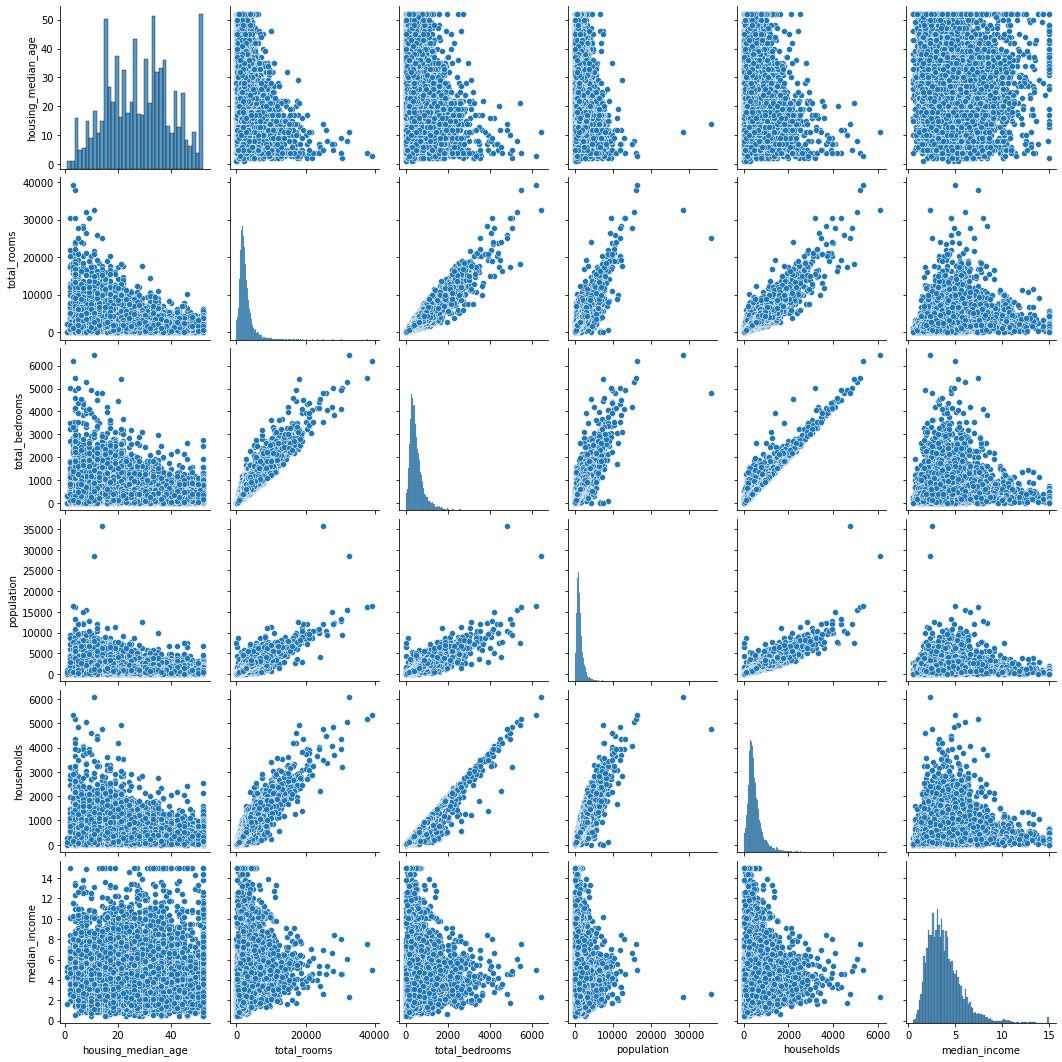

In [ ]:
# total_rooms, total_bedrooms, population and households seesm very correlated to each other
# housing_median_age and median_income do not seem correlated to the other features
sns.pairplot(df.drop(['median_house_value', 'latitude', 'longitude'], axis=1).select_dtypes(exclude=['category']))
plt.show()

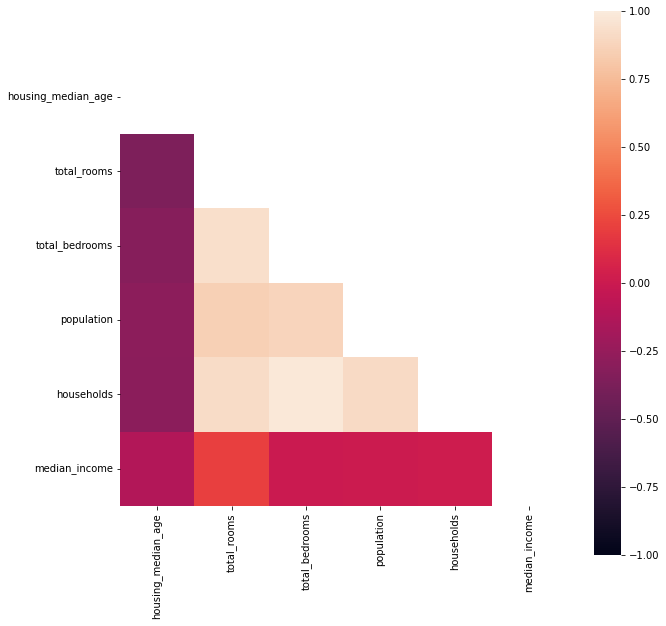

In [ ]:
corr = df.drop(['median_house_value', 'latitude', 'longitude'], axis=1).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, square=True, mask=np.triu(corr), ax=ax)
plt.show()

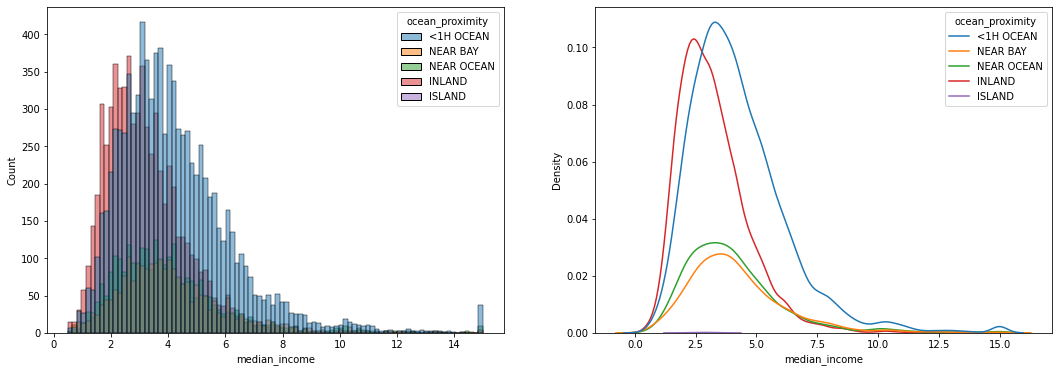

In [ ]:
# There almost no relationship between ocean_proximity and the other features
# (excepted for the longitude, latitude features)

fig, axs = plt.subplots(1,2,figsize=(18,6))
sns.histplot(df,
             x='median_income',
             hue='ocean_proximity',
             ax=axs[0])

sns.kdeplot(df,
            x='median_income',
            hue='ocean_proximity',
            ax=axs[1])

plt.show()

**<font color='blue'>6.b. Analyze the feature-label relationships using graphs, correlation ...<br>**

In [ ]:
# median_income is highly correlated with the label, it maight be a very important feature

df.drop(['latitude', 'longitude'], axis=1).corr()['median_house_value'].sort_values()

population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

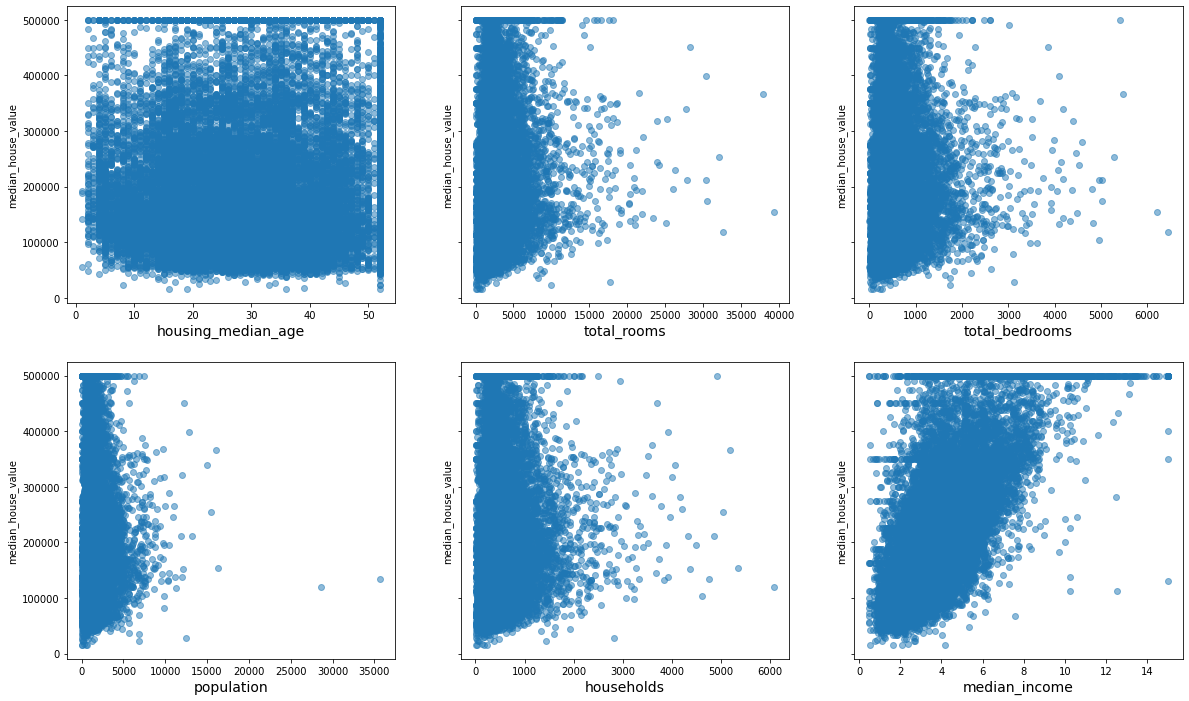

In [ ]:
# median_income is the only feature correlated with the label
# you can clearly see the median_house_value thresholds at 

fig, axs = plt.subplots(2, 3, sharey=True, figsize=(20,12))

for ax, col in zip(np.ravel(axs), df.drop(['latitude', 'longitude', 'median_house_value', 'ocean_proximity'], axis=1).columns):
    ax.scatter(df[col], df['median_house_value'], alpha=0.5)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('median_house_value')

plt.show()

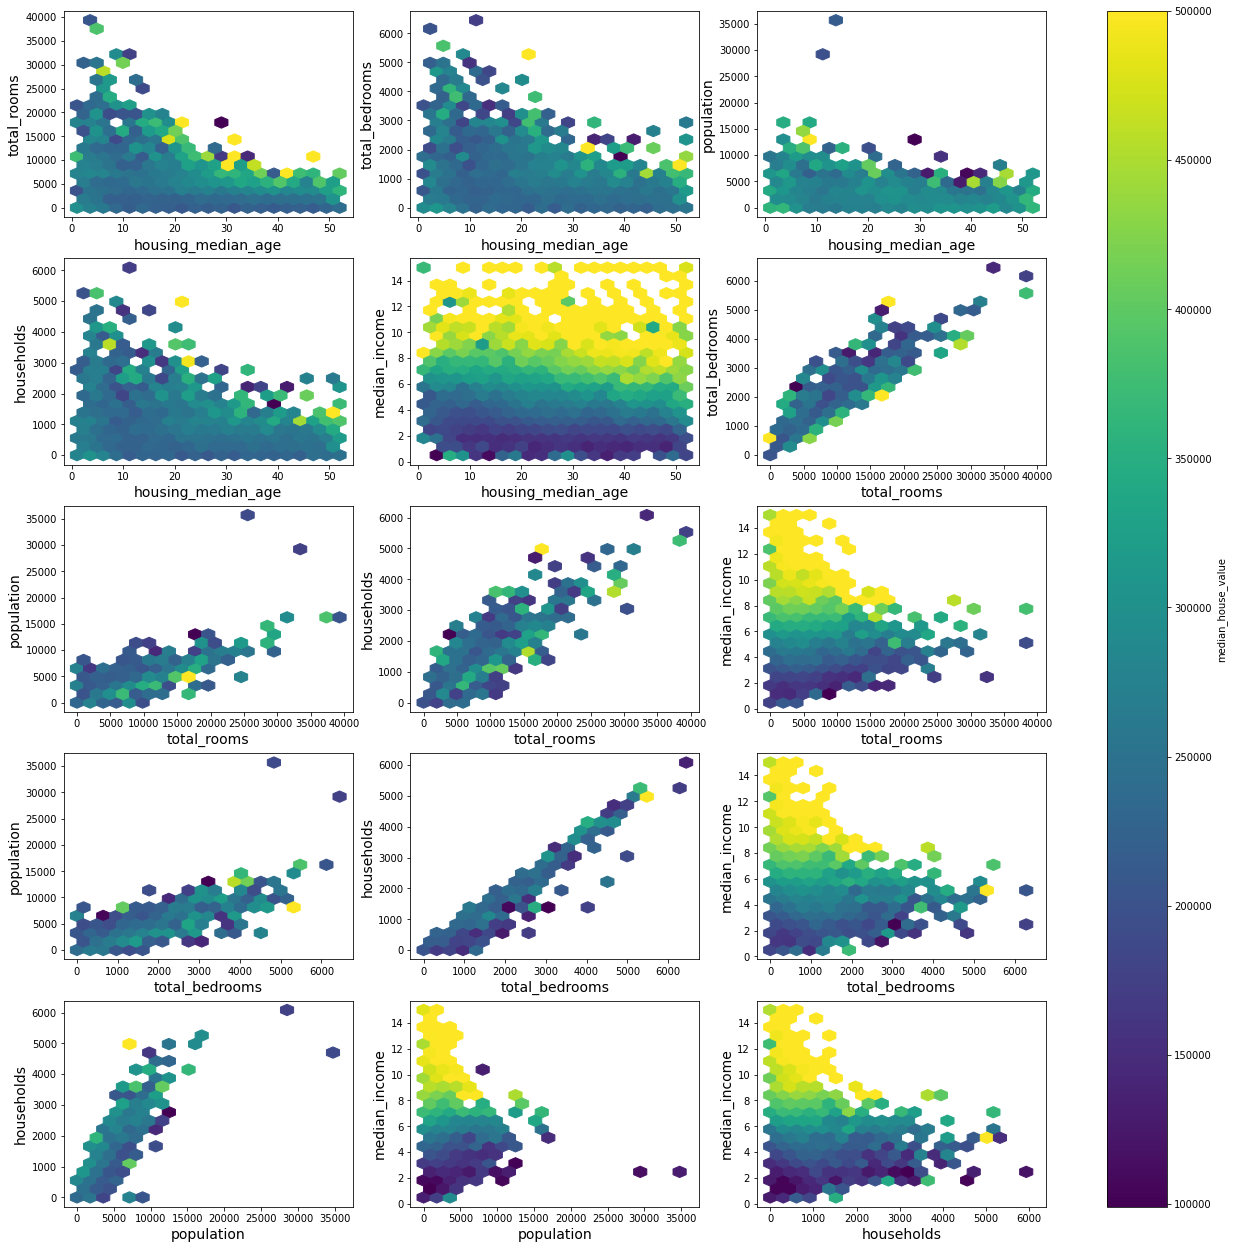

In [ ]:
# The label is correlated to a 2nd order relationship (feature-feature) 
# when the median_income feature is involved 

from itertools import combinations
combs = list(combinations(df.drop(['latitude', 'longitude', 'median_house_value', 'ocean_proximity'], axis=1).columns, 2))

fig, axs = plt.subplots(5, 3, figsize=(22,22))

for ax, cols in zip(np.ravel(axs), combs):

    g = ax.hexbin(df[cols[0]], 
                  df[cols[1]], 
                  C=df['median_house_value'], 
                  gridsize=20)
    
    ax.set_xlabel(cols[0], fontsize=14)
    ax.set_ylabel(cols[1], fontsize=14)

cb = fig.colorbar(g, ax=np.ravel(axs))
cb.set_label('median_house_value')

plt.show()

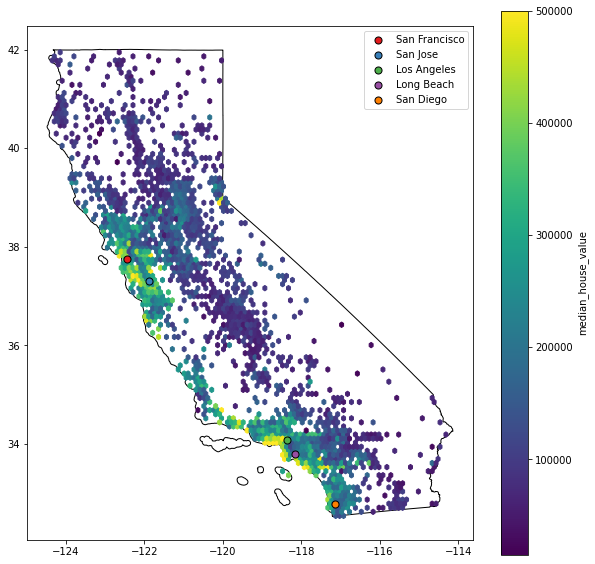

In [ ]:
# The most expensive houses are on the cost, generally close to big cities
fig, ax = plt.subplots(figsize=(10,10))

ca.plot(ax=ax, color='white', edgecolor='black')
g = ax.hexbin(df['longitude'], df['latitude'], C=df['median_house_value'])
for i, (_, row) in enumerate(cities.iterrows()):
    ax.scatter(row.geometry.x, row.geometry.y, marker='o', color=mpl.colormaps['Set1'].colors[i], edgecolor='black', label=row['AREANAME'], s=50)

cb = fig.colorbar(g, ax=ax)
cb.set_label('median_house_value')

plt.legend()
plt.show()

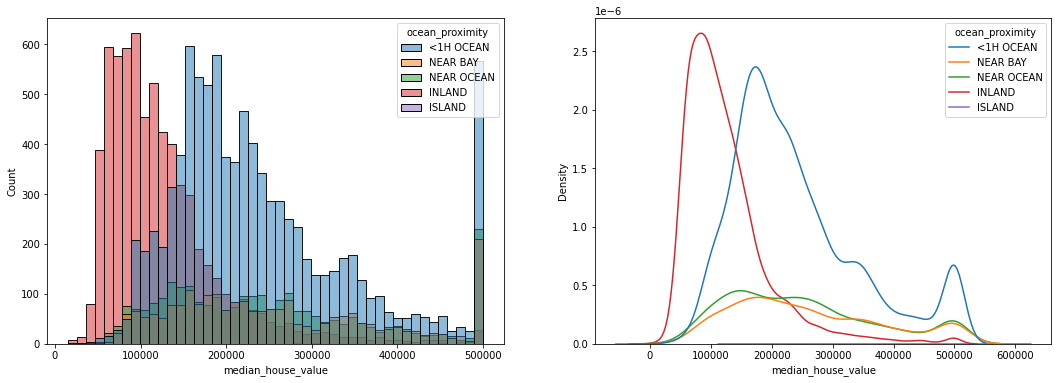

In [ ]:
# Inland seems to be very different from the other classes
# ocean_proximity may be an important feature for the task

fig, axs = plt.subplots(1,2,figsize=(18,6))
sns.histplot(df,
             x='median_house_value',
             hue='ocean_proximity',
             ax=axs[0])

sns.kdeplot(df,
            x='median_house_value',
            hue='ocean_proximity',
            ax=axs[1])

plt.show()

**Quick conclusions** of the Data Exploration part:


1.   The numerical label contain a maximum value that counts more than 900 houses : it might be a problem during training.
2.   Two features are directly correlated to the label : median_income (positive correlation) and ocean_proximity (inland houses are cheaper than the near bar, near ocean and <1h ocean ones)
3.   The longitude and latitude features relationship is correlated to the label: houses close to the coast and/or big cities are more expensive. It might be intersting to create features about the cities.



# Data Preprocessing

**<font color='blue'>1.a. Split the dataset into the features (X) and the label (y).**

In [ ]:
X = df.copy()
y = X.pop('median_house_value')

The **`KBinsDiscretizer`** is a transformer that discretizes continuous features into discrete bins. This can be useful when you want to convert continuous data into categorical data, which can be easier to work with in some cases especially when applying the Stratify Splitting method on continous labels.

---

*   **Inputs** - it takes as input a numpy array or a sparse matrix containing continuous numerical data. Specifically, it can handle both 1D and 2D arrays.
*   **Outputs** - it returns a numpy array or sparse matrix with the same number of rows as the input data, but with the continuous features replaced by categorical features.

---

It has several parameters that allow you to customize the behavior of the discretization. Some of the important parameters are:

* **`n_bins`**: This is the number of bins to use for the discretization. You can specify a single integer, in which case all features will be discretized into the same number of bins, or you can specify a list of integers, in which case each feature will be discretized into a different number of bins.
* **`encode`**: This parameter controls how the categorical features are encoded. By default, it uses a one-hot encoding, which means that each bin gets its own feature column. You can also specify 'ordinal' encoding, which means that each feature gets a single categorical column with values 0 through n_bins-1.
* **`strategy`**: This parameter controls how the bin edges are computed. The available strategies are 'uniform', which creates bins of equal width, and 'quantile', which creates bins of equal frequency.

---

To use the `KBinsDiscretizer`, you first create an instance of the class with the desired parameters, and then call the fit_transform method on your input data. This will fit the discretizer to your data and transform it into the categorical format.



```
kbins = KBinsDiscretizer(...)
y_cat = kbins.fit_transform(y_cat)
```


**<font color='blue'>1.b. Split the dataset into a training, a validation and testing set.<br> Stratify the splitting step.**

*Tips: You should use encode='ordinal'*

In [ ]:
# Only categorical labels can be used to stratify the splitting
# We need to transform the numerical label into a categorical one

from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=15,
                         encode='ordinal',
                         strategy='quantile')
y_cat = kbins.fit_transform(y.to_frame())             # Convert to frame to avoid the 1D shape error

In [ ]:
from sklearn.model_selection import train_test_split

test_size=0.2
val_size=0.1

X_train, X_test, y_train, y_test, y_cat_train, _ = train_test_split(X,y,y_cat,            # Send the categorical label to the splitter
                                                                    test_size=test_size,
                                                                    stratify=y_cat,
                                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,
                                                  test_size=val_size/(1-test_size),
                                                  stratify=y_cat_train,
                                                  random_state=42)

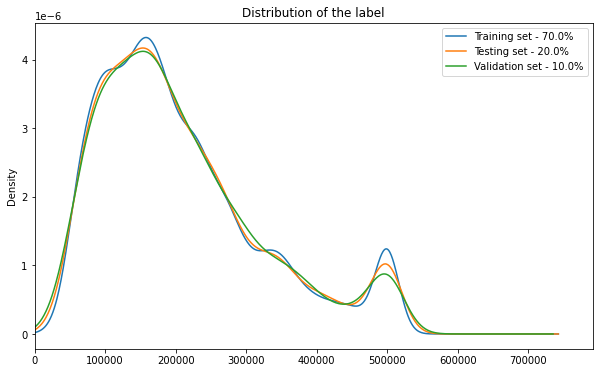

In [ ]:
# The distributions are very close
fig, ax = plt.subplots(figsize=(10,6))

y_train.plot.kde(ax=ax, label=f'Training set - {len(y_train)/len(y):.1%}')
y_test.plot.kde(ax=ax, label=f'Testing set - {len(y_test)/len(y):.1%}')
y_val.plot.kde(ax=ax, label=f'Validation set - {len(y_val)/len(y):.1%}')

ax.set_title('Distribution of the label')
ax.set_xlim(left=0)
plt.legend()
plt.show()

**<font color='blue'>2. Handle the missing values.**

In [ ]:
from sklearn.impute import SimpleImputer

simp = SimpleImputer(strategy='median')

X_train['total_bedrooms'] = simp.fit_transform(X_train[['total_bedrooms']])
X_val['total_bedrooms'] = simp.transform(X_val[['total_bedrooms']])
X_test['total_bedrooms'] = simp.transform(X_test[['total_bedrooms']])

**<font color='blue'>3. Handle the outliers**

In [ ]:
# Separating numerical and categorical data for preprocessing
X_train_num = X_train.drop('ocean_proximity', axis=1)
X_train_cat = X_train[['ocean_proximity']]
X_val_num = X_val.drop('ocean_proximity', axis=1)
X_val_cat = X_val[['ocean_proximity']]
X_test_num = X_test.drop('ocean_proximity', axis=1)
X_test_cat = X_test[['ocean_proximity']]

In [ ]:
# ocean_proximity
X_train_cat=X_train_cat.replace({'ISLAND':'<1H OCEAN'})
X_val_cat=X_val_cat.replace({'ISLAND':'<1H OCEAN'})
X_test_cat=X_test_cat.replace({'ISLAND':'<1H OCEAN'})

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Numerical features
class OutlierImputer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold, strategy):
        self.threshold = threshold
        self.strategy = strategy
        if self.strategy <= 0.5 or self.strategy >= 1 : raise(Exception("strategy should be ]0.5, 1[."))
    def fit(self, X, y=None):
        self.mean = X.mean()
        self.std = X.std()
        return self
    def transform(self, X, y=None):
        X = pd.DataFrame(X)
        X_zscore = (X - self.mean) / self.std
        X = X.mask(X_zscore > self.threshold, X.quantile(q=self.strategy), axis=1)
        X = X.mask(X_zscore < -self.threshold, X.quantile(q=1-self.strategy), axis=1)
        return X
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

outimp = OutlierImputer(threshold = 4, 
                        strategy = 0.8)

X_train_num = outimp.fit_transform(X_train_num)
X_val_num = outimp.transform(X_val_num)
X_test_num = outimp.transform(X_test_num)

<ipython-input-30-0ed767f1a4e4>:16: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  X = X.mask(X_zscore > self.threshold, X.quantile(q=self.strategy), axis=1)


**<font color='blue'>4. Preprocess the categorical data using the correct method.**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X_train_cat = ohe.fit_transform(X_train_cat)
X_val_cat = ohe.transform(X_val_cat)
X_test_cat = ohe.transform(X_test_cat)

**<font color='blue'>5. Preprocess the numerical data using the correct method.**

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_num = std.fit_transform(X_train_num)
X_val_num = std.transform(X_val_num)
X_test_num = std.transform(X_test_num)

In [ ]:
# Concatenate the preprocessed numerical and categorical variable into one dataset
X_train_f = np.concatenate([X_train_num, X_train_cat.todense()], axis=1)
X_train_f = pd.DataFrame(X_train_f, 
                         columns = np.concatenate([std.feature_names_in_, ohe.get_feature_names_out()]))

X_val_f = np.concatenate([X_val_num, X_val_cat.todense()], axis=1)
X_val_f = pd.DataFrame(X_val_f, 
                       columns = np.concatenate([std.feature_names_in_, ohe.get_feature_names_out()]))

X_test_f = np.concatenate([X_test_num, X_test_cat.todense()], axis=1)
X_test_f = pd.DataFrame(X_test_f, 
                        columns = np.concatenate([std.feature_names_in_, ohe.get_feature_names_out()]))

# Model Training

The multiple linear regression is a very simple model for regression that tries to fit a linear function to the data by finding the optimal values for the coefficients that minimize the mean squared error between the predicted values and the actual values.

`LinearRegression` can be found in sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

It has two important parameters:


*   **`fit_intercept`**: whether to fit the intercept term in the linear model (default=True).
*   **`normalize`**: whether to normalize the input variables (default=False).

To train the model:


1.   First, import the `LinearRegression` module from `sklearn.linear_model`.
2.   Then, create an instance of the `LinearRegression` class and call the `fit(X, y)` method with the input data X and label values y to train the model.


**<font color='blue'>1.a. Using the `LinearRegression` model from sklearn, train the model on the training set.**

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_f, y_train)

LinearRegression()

The `LinearRegresion` class in sklearn has many attributes.<br>Here are some of the most important ones:

*  **`coef_`**: the coefficients of the linear regression model.
*  **`intercept_`**: the intercept term of the linear regression model.

**<font color='blue'>1.b. Use the `.coef_` and and the `.intercept_` attributes to get the coefficients and the bias of the multiple linear regression.<br> Which feature seems to be the most important ?**

In [ ]:
print(f"Coefficients : {linreg.coef_}")
print(f"Intercept: {linreg.intercept_}")

Coefficients : [-52321.21126627 -53186.60250251  15106.82668985  -4799.54776372
  27002.33450614 -38739.12254426  21584.55996971  72465.98557174
  10512.48620453 -29304.20436678   4410.8437264   14380.87443585]
Intercept: 208983.90323622772


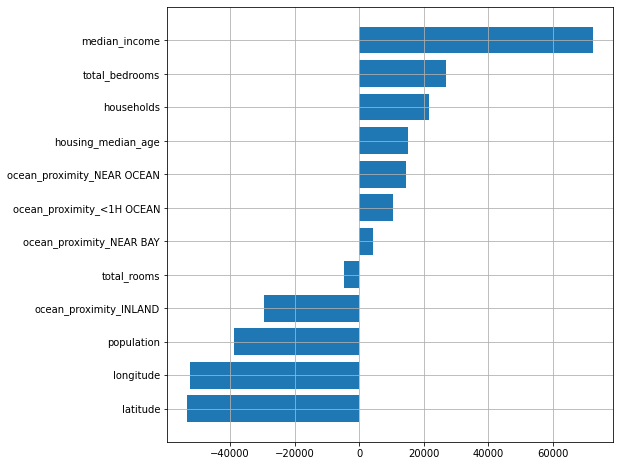

In [ ]:
# median_income is the most important feature and is highly positively related to the label
# total_bedrooms, households, housing_median_age are softly positively related to the label
# the ocean related categories of the ocean_proximity are positively related to the label
# total_rooms and the ocean_proximity near_bay category are uninformative features for the task
# the ocean_proximity inland category and population are negatively related to the label
# the longitude and latitude are highly negatively related to the label
# Most of these conclusions confirm the data exploration part

plt.figure(figsize=(8,8))
idx = np.argsort(linreg.coef_)
plt.barh(X_train_f.columns[idx], linreg.coef_[idx])
plt.grid('on')
plt.show()

The `LinearRegresion` class in sklearn has many methods.<br>Here are some of the most important ones:

* **`fit()`**: fits the linear regression model to the input data X and label values y.
* **`predict()`**: predicts the label values for the input data X.
* **`score()`**: returns the $R^2$ coefficient of determination of the linear regression model, which measures the proportion of the variance in the label variable that is explained by the model.

**<font color='blue'>1.c. Get the $R^2$ of the multiple linear regression using the `.score()` function on the validation set.**

In [ ]:
# Around 62% of the variance of the label is explained by the features
linreg.score(X_val_f, y_val)

0.6171541687537316

**<font color='blue'>1.d. Predict the label values of the validation set using the `.predict()` method.**

In [ ]:
y_pred = linreg.predict(X_val_f)
y_pred[:10]

array([147208.84445341, 150948.9750211 , 169276.01771338,  42505.814937  ,
       421182.89309709, 327093.63037914,  60155.00070293, 244903.20347834,
       314178.02860824, 384888.21855767])

It is important to keep in mind that the $R^2$ is just one metric for evaluating the performance of a regression model. It does not tell us whether the model is overfitting or underfitting the data, or whether there are any outliers or influential data points that could be skewing the results.

Therefore, it's important to also consider other metrics.

Fortunately, sklearn has many regression metrics in the `sklearn.metrics` module [here](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) 

**<font color='blue'>1.e. Calculate the mean squared error and the root mean squared error using the `mean_squared_error` function from sklearn using the predictions and the true values.**

In [ ]:
# MSE is really hard to interpret because it does not have the same unit as the label
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_pred)
print(f'The mean squared error of the validation set is      : {mse:.0f}')
print(f'The root mean squared error of the validation set is : {np.sqrt(mse):.0f}')

The mean squared error of the validation set is      : 5044655126
The root mean squared error of the validation set is : 71026


**The `cross_val_score` function in scikit-learn is a convenient way to perform cross-validation and obtain a score for each fold.** The function takes as input a model, the input data X, the label values y, and the number of folds. It then splits the data into a number of folds, fits the model on the training data for each fold, and computes the score on the validation data. **The output will be an array of scores, one for each fold.**

Note that the `cross_val_score` function uses the default scoring metric for the given model. For `LinearRegression`, this is the $R^2$ coefficient of determination. You can also specify a different scoring metric by passing it as the `scoring` parameter to the cross_val_score function.

The `cross_val_score` sklearn implementation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

Here are some of the most important parameters:

* **`estimator`**: *The model object that implements the algorithm to be evaluated. This can be any object that implements the fit method, such as a classifier or a regressor.*

* **`X`**: *The input features used to train the model.*

* **`y`**: *The label variable used to train the model.*

* **`cv`**: *The number of folds to use for cross-validation. This can be an integer or an object that implements the splitter interface, such as `KFold` or `StratifiedKFold` from sklearn.*

* **`scoring`**: *The scoring metric to use for evaluating the performance of the estimator. This can be a string or a callable object that takes two arguments (the true values and the predicted values) and returns a scalar score. You can find all the predefined metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values).*

> *The `cross_val_predict` function in scikit-learn is used to make predictions on the validation data using a model that has been trained using cross-validation. It is similar to the `cross_val_score` function, but instead of returning a score, it returns the predicted label values for each sample in the validation data.*

**<font color='blue'>2.a. Do a cross validation method with 5 folds with the `cross_val_score` function from sklearn on the multiple linear regression.<br> Set the `scoring` parameter to `'neg_mean_squared_error'`.**

*Tips: There is no `mean_squared_error`. The reason for providing `neg_mean_squared_error` instead of `mean_squared_error` is that scikit-learn uses a convention where optimization functions should be maximized, rather than minimized.*

In [ ]:
from sklearn.model_selection import cross_val_score

score = -cross_val_score(linreg,
                         X_train_f,
                         y_train,
                         cv=5,
                         scoring='neg_mean_squared_error')
score

array([4.86195865e+09, 4.65102105e+09, 4.81555513e+09, 5.06753489e+09,
       5.05511759e+09])

**<font color='blue'>2.b. Get the average and the standard deviation of the mean squared errors obtained with the cross validation method.<br> Do the same for the root mean squared error.**

*Tips: You can use `mean()` and `std()` from Numpy.*

In [ ]:
print(f"The mean squared error of the cross validation is      : {score.mean():.0f} +/- {score.std():.0f}")
print(f"The root mean squared error of the cross validation is : {np.sqrt(score).mean():.0f} +/- {np.sqrt(score).std():.0f}")

The mean squared error of the cross validation is      : 4890237462 +/- 156346711
The root mean squared error of the cross validation is : 69921 +/- 1120


When using cross-validation, the data is divided into multiple folds, and the model is trained and tested on different subsets of the data. However, **the preprocessing steps, such as scaling or normalization, are typically applied to the entire dataset before the data is divided into folds**. 

This means that **each validation set is generated out of an already preprocessed training set**, which can result in an overestimation of the model's performance. 

One way to address this issue is to **include the preprocessing steps as part of the cross-validation process**. This can be done by using a pipeline that includes both the preprocessing steps and the estimator. The pipeline can then be passed to the `cross_val_score` function instead of the estimator alone.

---

The **`Pipeline`** class in sklearn is a tool for chaining multiple processing steps together into a single estimator. It can be used to automate the workflow of a machine learning project by **combining data preprocessing and modeling into a single object** that can be used for training and prediction. It can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline).

The most important parameter of the Pipeline is the steps: it is a list of tuples, where each tuple contains the name of the step and the processing object. The steps are executed in the order they are listed. 

```
model = Pipeline(steps=[('preprocesing', StandardScaler()),        # Preprocessing
                        ('model', LinearRegression())])            # Model

```

---

If there are different preprocessing functions for some features of the input data, the sklearn **`ColumnTransformer`** class can be used along with the Pipeline class. It can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer).

Here are the most important parameters of the `ColumnTransformer` class:

*   **`transformers`**: This is a list of tuples, where each tuple contains the name of the transformer, the transformer object, and the columns to apply the transformer to. The name is a string that identifies the transformer, and the transformer object is an instance of a transformer class (such as StandardScaler or OneHotEncoder). The columns parameter is a list of column indices or column names to apply the transformer to.

*   **`remainder`**: This parameter controls what to do with the columns that are not transformed. By default, the remainder is set to 'drop', which means that any columns that are not specified in the transformers list will be dropped. You can also set the remainder to 'passthrough', which means that any columns that are not specified in the transformers list will be left unchanged.

*   **`sparse_threshold`**: This parameter controls whether the output of the transformation should be sparse or dense. If the number of non-zero elements in the transformed data is less than the sparse_threshold parameter, then the output will be sparse. Otherwise, the output will be dense.

Generally, the numerical and the categorical data preprocessing steps are separated.<br> Here an example below:

```
ct = ColumnTransformer(transformers=[('numerical', StandardScaler(), ['age', 'income']),
                                     ('nominal_cat', OneHotEncoder(), ['gender', 'education'])],
                       remainder='passthrough'))

```

The resulting preprocessor object is then passed to a `Pipeline` object along with the `LinearRegression` model, creating a pipeline that includes the appropriate preprocessing steps for each column of the input data.

**<font color='blue'>3. Use the `ColumnTransformer`, the `Pipeline` and the `cross_val_score` classes to do a cross validation with 5 folds on the multiple linear regression.**

In [ ]:
# Reset the preprocessing steps
X_train, X_test, y_train, y_test, y_cat_train, _ = train_test_split(X,y,y_cat,            
                                                                    test_size=test_size,
                                                                    stratify=y_cat,
                                                                    random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Creating a Pipeline that contains all the preprocessing for categorical data
cat_transformer = Pipeline([('Outliers', FunctionTransformer(lambda x:x.replace({'ISLAND':'<1H OCEAN'}))),
                            ('Encoding', OneHotEncoder())])

# Creating a Pipeline that contains all the preprocessing for numerical data
num_transformer = Pipeline([('Missing values', SimpleImputer(strategy='median')),
                            ('Outliers', OutlierImputer(threshold = 4, strategy = 0.8)),
                            ('Standardize', StandardScaler())])

# Merging everything with the column transformer
ct = ColumnTransformer([('cat', cat_transformer, X.select_dtypes(include='category').columns),
                        ('num', num_transformer, X.select_dtypes(exclude='category').columns)])

In [ ]:
# Creating a pipeline to combine the preprocessing steps and the model
pipe = Pipeline([('Preprocessing', ct),
                 ('model', LinearRegression())])

# Using the cross validation on the pipeline so that the validation preprocessing correctly computed
score_linreg = -cross_val_score(pipe,
                                X_train,
                                y_train,
                                cv=5,
                                scoring='neg_mean_squared_error')

print(f"The mean squared error of the cross validation is      : {score_linreg.mean():.0f} +/- {score_linreg.std():.0f}")
print(f"The root mean squared error of the cross validation is : {np.sqrt(score_linreg).mean():.0f} +/- {np.sqrt(score_linreg).std():.0f}")

The mean squared error of the cross validation is      : 4915611047 +/- 199724026
The root mean squared error of the cross validation is : 70097 +/- 1434


Decision Trees can be used for regression tasks.

The sklearn implementation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

Here are some of the most important parameters of the `DecisionTreeRegressor`:

* **`criterion`**: This parameter controls the criterion used to measure the quality of each split. The default value is 'mse', which stands for mean squared error. Other options include 'friedman_mse', which uses the Friedman mean squared error, and 'mae', which uses the mean absolute error.

* **`splitter`**: This parameter controls the strategy used to choose the feature to split on at each node. The default value is 'best', which means that the algorithm will choose the best feature to split on based on the criterion. Other options include 'random', which means that the algorithm will choose a random feature to split on.

* **`max_depth`**: This parameter controls the maximum depth of the decision tree. The default value is None, which means that the tree will be grown until all the leaves are pure or until all the nodes contain fewer samples than the minimum number of samples required to split. Setting max_depth to a smaller value can help prevent overfitting.

* **`min_samples_split`**: This parameter controls the minimum number of samples required to split an internal node. The default value is 2, which means that an internal node must have at least 2 samples to be split. Setting min_samples_split to a larger value can help prevent overfitting.

* **`min_samples_leaf`**: This parameter controls the minimum number of samples required to be at a leaf node. The default value is 1, which means that a leaf node must have at least 1 sample. Setting min_samples_leaf to a larger value can help prevent overfitting.

* **`max_features`**: This parameter controls the maximum number of features that are considered for each split. The default value is None, which means that all features are considered. Setting max_features to a smaller value can help prevent overfitting.

**<font color='blue'>4. Train a `DecisionTreeRegressor` model the same way (cross-validation) with the default parameters and save the RMSE score.**

*Tips: Don't forget to set the `random_state` parameter of the `DecisionTreeRegressor`*

In [ ]:
from sklearn.tree import DecisionTreeRegressor

pipe = Pipeline([('Preprocessing', ct),
                 ('model', DecisionTreeRegressor(random_state=42))])

scor_dtr = -cross_val_score(pipe,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='neg_mean_squared_error')

print(f"The mean squared error of the cross validation is      : {scor_dtr.mean():.0f} +/- {scor_dtr.std():.0f}")
print(f"The root mean squared error of the cross validation is : {np.sqrt(scor_dtr).mean():.0f} +/- {np.sqrt(scor_dtr).std():.0f}")

The mean squared error of the cross validation is      : 4860066588 +/- 172722896
The root mean squared error of the cross validation is : 69703 +/- 1248


Support Vector Machine can be used for regression tasks.

The sklearn implementation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

Here are some of the most important parameters of the SVR:

* **`kernel`**: This parameter specifies the kernel function to use. The default value is 'rbf', which stands for radial basis function. Other options include 'linear', which uses a linear kernel, and 'poly', which uses a polynomial kernel.

* **`C`**: This parameter controls the trade-off between maximizing the margin and minimizing the errors. The default value is 1.0, which means that the algorithm will try to find a balance between these two objectives. Setting C to a larger value will place more emphasis on maximizing the margin, while setting it to a smaller value will place more emphasis on minimizing the errors.

* **`gamma`**: This parameter controls the width of the kernel function. The default value is 'scale', which means that the value of gamma is set to 1 / (n_features * X.var()) for the input data X. Other options include 'auto', which is equivalent to 'scale', and 'float', which allows you to manually set the value of gamma.

* **`epsilon`**: This parameter controls the size of the margin. The default value is 0.1, which means that the margin is 0.1 units wide. Setting epsilon to a larger value will increase the size of the margin, while setting it to a smaller value will decrease the size of the margin.

**<font color='blue'>5. Train a `SVR` model the same way (cross-validation) with the default parameters and save the RMSE score.**

In [ ]:
from sklearn.svm import SVR

pipe = Pipeline([('Preprocessing', ct),
                 ('model', SVR())])

scor_svr = -cross_val_score(pipe,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='neg_mean_squared_error')

print(f"The mean squared error of the cross validation is      : {scor_svr.mean():.0f} +/- {scor_svr.std():.0f}")
print(f"The root mean squared error of the cross validation is : {np.sqrt(scor_svr).mean():.0f} +/- {np.sqrt(scor_svr).std():.0f}")

The mean squared error of the cross validation is      : 13994276620 +/- 574760491
The root mean squared error of the cross validation is : 118273 +/- 2422


k-nearest neighbors algorithms can be used for regression tasks.

The sklearn implementation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

Here are some of the most important parameters of the `KNeighborsRegressor`:

*   **`n_neighbors`**: This is the number of neighbors to consider when making a prediction. It can be set to an integer value, or it can be set to a callable that takes in a data point and returns the number of neighbors to consider.
*   **`weights`**: This parameter determines how the neighbors are weighted when making a prediction. It can be set to 'uniform', which gives all neighbors equal weight, or 'distance', which gives more weight to closer neighbors.
*   **`algorithm`**: This parameter determines the algorithm used to compute nearest neighbors. It can be set to 'auto', which chooses the most appropriate algorithm based on the input data, or it can be set to 'brute', 'kd_tree', or 'ball_tree' for specific algorithms.
*   **`leaf_size`**: This parameter is only used for kd_tree and ball_tree algorithms. It determines the size of the leaf nodes in the tree, which affects the speed and memory usage of the algorithm.
*   **`p`**: This parameter determines the distance metric used to compute nearest neighbors. It can be set to 1 for Manhattan distance, 2 for Euclidean distance, or any other positive value for Minkowski distance.

**<font color='blue'>6. Train a `SVR` model the same way (cross-validation) with the default parameters and save the RMSE score.**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

pipe = Pipeline([('Preprocessing', ct),
                 ('model', KNeighborsRegressor())])

scor_knr = -cross_val_score(pipe,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='neg_mean_squared_error')

print(f"The mean squared error of the cross validation is      : {scor_knr.mean():.0f} +/- {scor_knr.std():.0f}")
print(f"The root mean squared error of the cross validation is : {np.sqrt(scor_knr).mean():.0f} +/- {np.sqrt(scor_knr).std():.0f}")

The mean squared error of the cross validation is      : 3764448235 +/- 158883373
The root mean squared error of the cross validation is : 61341 +/- 1306


**<font color='blue'>7. Compare the RMSE scores.<br>Which model seems to be the best ?**

In [ ]:
print(f"The root mean squared error of the cross validation is : {np.sqrt(score_linreg).mean():6.0f} +/- {np.sqrt(score_linreg).std():.0f}")
print(f"The root mean squared error of the cross validation is : {np.sqrt(scor_dtr).mean():6.0f} +/- {np.sqrt(scor_dtr).std():.0f}")
print(f"The root mean squared error of the cross validation is : {np.sqrt(scor_svr).mean():6.0f} +/- {np.sqrt(scor_svr).std():.0f}")
print(f"The root mean squared error of the cross validation is : {np.sqrt(scor_knr).mean():6.0f} +/- {np.sqrt(scor_knr).std():.0f}")

The root mean squared error of the cross validation is :  70097 +/- 1434
The root mean squared error of the cross validation is :  69703 +/- 1248
The root mean squared error of the cross validation is : 118273 +/- 2422
The root mean squared error of the cross validation is :  61341 +/- 1306
